In [1]:
import numpy as np
from matplotlib import pyplot as plt
import allantools as at
from fticr_toolkit import ideal_trap_physics as itp

In [39]:
Rb = 10000

nures1 = 736070
nures2 = 501550

V1 = -30.17
V2 = -13.97032
V22 = (nures2/nures1)**2*V1
print(V1, V2, V22)

def r1(R2, Uin, Uout):
    return R2*(Uin/Uout - 1)

def r2(R1, Uin, Uout):
    return R1/(Uin/Uout - 1)

def uout(Uin, R1, R2):
    return Uin*R2/(R1+R2)

def i(Uin, R1, R2):
    return Uin/(R1+R2)

def noise(R, T=300, kb=1.381e-23, time=10, rate = 0.001):
    times = np.arange(0, time, rate)
    measurements = int(time/rate)
    skip_data = int(measurements*0.05)
    spectral_noise_density = np.sqrt(4*kb*T*R)
    signal = at.noise.white(measurements, spectral_noise_density**2, 1/rate)
    plt.plot(times, signal)
    plt.show()
    (t2, ad, ade, adn) = at.adev(signal, rate=1/rate, data_type="freq") 
    #(t2, ad, ade, adn) = at.adev(signal[skip_data:], rate=rate, data_type="freq", taus=times[:-skip_data]) 
    plt.loglog(t2, ad)
    plt.loglog(t2, [np.mean(signal)]*len(t2))
    plt.show()
    return np.mean(signal), np.std(signal), ad[-1]

-30.17 -13.97032 -14.007658475709874


R1 [Ohm] 11538
R2 [Ohm] 10000
R gesamt [Ohm] 21538
I divider [mA] -1.4007800167146438


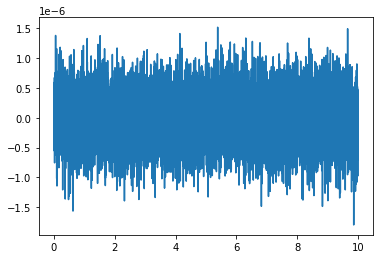

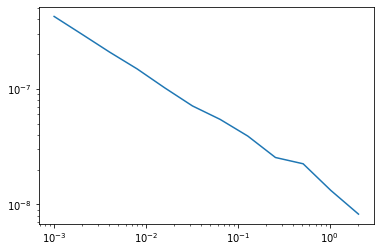

Vnoisemean [V] -2.4087802746936348e-09
Vnoise [Vpp] 4.212042538300186e-07
VnoiseADend [V] 8.236388254687038e-09


In [40]:
Ra = int(r1(Rb, V1, V22))
print('R1 [Ohm]', Ra)
print('R2 [Ohm]', Rb)
print('R gesamt [Ohm]', Ra+Rb)


idiv = i(V1, Ra, Rb)
print('I divider [mA]', idiv*1000)

Vnoisemean, Vnoisepp, VnoiseADend = noise(Ra+Rb)
print('Vnoisemean [V]', Vnoisemean)
print('Vnoise [Vpp]', Vnoisepp)
print('VnoiseADend [V]', VnoiseADend)

In [41]:
poti = 1000
poti_steps = 256
Raspace = np.linspace(Ra, Ra + poti, poti_steps)
Uspace = uout(V1, Raspace, Rb)
nuzspace = itp.omegaz(44, 176, Uspace)/2/np.pi
print("min/max nuz in trap 3", min(nuzspace), max(nuzspace) )
print("range nuz in trap 3", max(nuzspace) - min(nuzspace) )
print("step nuz in trap 3", nuzspace[1]-nuzspace[0] )

min/max nuz in trap 3 494688.1948012989 506041.9813353319
range nuz in trap 3 11353.786534033017
step nuz in trap 3 -46.06294465105748


In [42]:
poti = 10000
poti_steps = 1024
Raspace = np.linspace(Ra, Ra + poti, poti_steps)
Uspace = uout(V1, Raspace, Rb)
nuzspace = itp.omegaz(44, 176, Uspace)/2/np.pi
print("min/max nuz in trap 3", min(nuzspace), max(nuzspace) )
print("range nuz in trap 3", max(nuzspace) - min(nuzspace) )
print("step nuz in trap 3", nuzspace[1]-nuzspace[0] )

min/max nuz in trap 3 418188.570908623 506041.9813353319
range nuz in trap 3 87853.41042670893
step nuz in trap 3 -114.79626167420065


In [43]:
Ra/Rb

1.1538

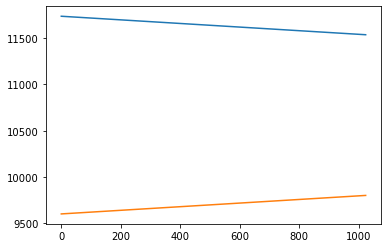

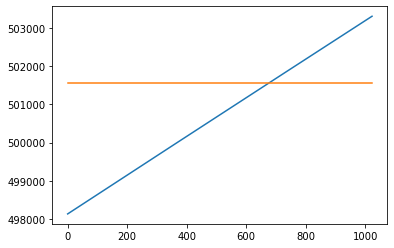

min/max/center nuz in trap 3 498136.07552197995 503298.24526743795 500726.33582261985
range nuz in trap 3 5162.169745457999
step nuz in trap 3 5.072229751269333


In [55]:
# poti as center 

poti = 200
poti_steps = 1024
potispace = np.linspace(0, poti, poti_steps)
Raspace = Ra + potispace[::-1] #- poti
Rbspace = Rb + potispace - poti*2

plt.plot(Raspace)
plt.plot(Rbspace)
plt.show()

Uspace = uout(V1, Raspace, Rbspace)
nuzspace = itp.omegaz(44, 176, Uspace)/2/np.pi

plt.plot(nuzspace)
plt.plot([nures2]*len(nuzspace))
plt.show()
print("min/max/center nuz in trap 3", min(nuzspace), max(nuzspace), nuzspace[int(len(nuzspace)/2)] )
print("range nuz in trap 3", max(nuzspace) - min(nuzspace) )
print("step nuz in trap 3", nuzspace[1]-nuzspace[0] )